In [2]:
from prody import *
from pylab import *
from matplotlib.pylab import *
ion()
import numpy as np
import matplotlib.pyplot as plt

# Load PDB files
pdb1 = parsePDB('5UH5_f_r.pdb')
pdb2 = parsePDB('6C04_r_f.pdb')

#  Select C-alpha atoms from proteins and P atoms from nucleic acids
atoms1 = pdb1.select('(protein and name CA) ')
atoms2 = pdb2.select('(protein and name CA) ')

# Create ANM objects for each PDB file
anm1 = ANM()
anm2 = ANM()

# Build Hessian matrices for each PDB file
anm1.buildHessian(atoms1, cutoff=15, gamma=10)
anm2.buildHessian(atoms2, cutoff=15, gamma=10)

# Calculate modes for each PDB file
anm1.calcModes()
anm2.calcModes()

# Calculate square fluctuations for both ANMs
sfs1 = calcSqFlucts(anm1[:20])
sfs2 = calcSqFlucts(anm2[:20])

# Get a dictionary of chains in the PDBs
#chains1 = set(ca_all1.getChids())
#chains2 = set(ca_all2.getChids())

#common_chains = chains1.intersection(chains2)
#
# print(common_chains)
'''
for chain in chains:
    sel1 = atoms1.select('chain ' + chain)
    sel2 = atoms2.select('chain ' + chain)
    sfs1 = calcSqFlucts(anm1[:20])
    sfs2 = calcSqFlucts(anm2[:20])

    # Plot the data
    fig, ax = plt.subplots()
    ax.plot(sfs1, label='PDB1')
    ax.plot(sfs2, label='PDB2')
    ax.legend()
    ax.set_title('Square Fluctuations for Chain ' + chain)
    ax.set_xlabel('Residue Index')
    ax.set_ylabel('Square Fluctuation (Å$^2$)')
    plt.show()
'''

@> 52024 atoms and 1 coordinate set(s) were parsed in 0.49s.
@> 55535 atoms and 1 coordinate set(s) were parsed in 0.37s.
@> Hessian was built in 1.78s.
@> Hessian was built in 1.83s.
@> 20 modes were calculated in 100.63s.
@> 20 modes were calculated in 113.70s.


"\nfor chain in chains:\n    sel1 = atoms1.select('chain ' + chain)\n    sel2 = atoms2.select('chain ' + chain)\n    sfs1 = calcSqFlucts(anm1[:20])\n    sfs2 = calcSqFlucts(anm2[:20])\n\n    # Plot the data\n    fig, ax = plt.subplots()\n    ax.plot(sfs1, label='PDB1')\n    ax.plot(sfs2, label='PDB2')\n    ax.legend()\n    ax.set_title('Square Fluctuations for Chain ' + chain)\n    ax.set_xlabel('Residue Index')\n    ax.set_ylabel('Square Fluctuation (Å$^2$)')\n    plt.show()\n"

In [3]:
import prody as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio


# Get a dictionary of chains in the PDBs
chains1 = set(atoms1.getChids())
chains2 = set(atoms2.getChids())

common_chains = chains1.intersection(chains2)
print(sorted(common_chains))

# Select chain A and CA atoms
chain_a = pdb1.select('chain A and name CA')
label = chain_a.getResnums()

arr_chain_beg = 0
arr_chain_end = 0
for i in sorted(common_chains):
    print(i)
    chain_1 = pdb1.select('chain '+i+' and name CA')
    chain_2 = pdb2.select('chain '+i+' and name CA')
    label_1 = chain_1.getResnums()
    label_2 = chain_2.getResnums()
    arr_chain_end += len(chain_1) 
    a_len_1 = [i.getResnum() for i in chain_1]
    a_len_2 = [i.getResnum() for i in chain_2]
    x_values_1_un = sfs1[arr_chain_beg: arr_chain_end]
    x_values_1 = (np.array(x_values_1_un) - np.min(x_values_1_un)) / np.ptp(x_values_1_un)
    x_values_2_un = sfs2[arr_chain_beg: arr_chain_end]
    x_values_2 = (np.array(x_values_2_un) - np.min(x_values_2_un)) / np.ptp(x_values_2_un)
    fig = make_subplots()
    fig.add_trace(go.Scatter(x=a_len_2, y=x_values_2, mode='lines', name='Protein 2',
                             line=dict(color='#ff7f0e', width=3),
                             fill='tozeroy', fillcolor='rgba(255, 127, 14, 0.6)'),
                  row=1, col=1)
    fig.add_trace(go.Scatter(x=a_len_1, y=x_values_1, mode='lines', name='Protein 1',
                             line=dict(color='#1f77b4', width=3),
                             fill='tozeroy', fillcolor='rgba(31, 119, 180, 0.6)'),
                  row=1, col=1)
    
    xticks = np.linspace(min(a_len_1), max(a_len_1), num=10, dtype=int)
    xticks_size = 20
    
    fig.update_layout(xaxis=dict(title='Residue number',titlefont=dict(size=18, family='Times New Roman'),
                                tickmode='array', tickvals=xticks, ticktext=xticks),
                                yaxis=dict(title='Normalized square fluctuations', titlefont=dict(size=18, family='Times New Roman')))
    fig.update_layout(xaxis=dict(tickmode='array', tickvals=xticks, ticktext=xticks,
                             tickfont=dict(size=xticks_size, family='Times New Roman'),linewidth=2, linecolor='black'),
                             yaxis=dict(linewidth=2, linecolor='black'))
    '''
    fig.add_trace(go.Scatter(x=a_len_2, y=x_values_2, mode='lines', name='Protein 2',
                             line=dict(color='#ff7f0e', width=3),fill='tozeroy', 
                             fillcolor='rgba(255, 127, 14, 0.6)'))
    fig.add_trace(go.Scatter(x=a_len_1, y=x_values_1, mode='lines', name='Protein 1',
                             line=dict(color='#1f77b4', width=3),
                             fill='tozeroy', fillcolor='rgba(31, 119, 180, 0.6)'))
    
    xticks = np.linspace(min(a_len_1), max(a_len_1), num=10, dtype=int)
    xticks_size = 25
    fig.update_layout(xaxis=dict(title='Residue number',titlefont=dict(size=18, family='Times New Roman'),
                                tickmode='array', tickvals=xticks, ticktext=xticks),
                                yaxis=dict(title='Square fluctuations', titlefont=dict(size=18, family='Times New Roman')))
    '''
    fig.update_layout(title=dict(text='Normalized square fluctuations', font=dict(size=24, family='Times New Roman')))
    fig.update_xaxes(showline=True, linewidth=2, linecolor='black')
    fig.update_yaxes(showline=True, linewidth=2, linecolor='black')
    fig.update_layout(title={'text': 'Protein comparison plot', 'font': {'size': 24, 'family': 'Arial'}},
                  plot_bgcolor='white')

    #fig.show()
    fig.show()
    pio.write_image(fig, i+'_nma_fluct.png', scale=6)
    '''
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=a_len_1, y=x_values_1, mode='lines'))
    fig.add_trace(go.Scatter(x=a_len_2, y=x_values_2, mode='lines'))
    xticks = np.linspace(min(a_len_1), max(a_len_1), num=10, dtype=int)
    fig.update_layout(xaxis=dict(tickmode='array', tickvals=xticks, ticktext=xticks))
    fig.update_layout(xaxis=dict(title='Residue Number', tickmode='array', tickvals=xticks, ticktext=xticks,title_font=dict(size=18)),
                      yaxis=dict(title='Square fluctuations'),title_font=dict(size=18))
    fig.show()
    '''
    arr_chain_beg += len(chain_1)


['A', 'B', 'C', 'D', 'E', 'F']
A


B


C


D


E


F


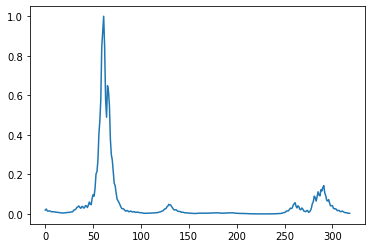

In [7]:
x_values_normalized = (np.array(x_values_1) - np.min(x_values_1)) / np.ptp(x_values_1)
plot(x_values_normalized)

In [6]:
pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2360 sha256=42aa34d42358c10445a7bc6402956e3b0135af76c887ff799667cef05d92189d
  Stored in directory: /home/sneha/.cache/pip/wheels/84/3f/80/e49971719e76c0387733de7973744b4b19b01dc14afcce8829
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots()

# add traces and update x-axis tickvals and ticktext
fig.add_trace(go.Scatter(x=a_len_1, y=x_values_1, mode='lines', name='Protein 1',
                             line=dict(color='#1f77b4', width=3),
                             fill='tozeroy', fillcolor='rgba(31, 119, 180, 0.6)'),
                  row=1, col=1)
fig.add_trace(go.Scatter(x=a_len_2, y=x_values_2, mode='lines', name='Protein 2',
                             line=dict(color='#ff7f0e', width=3),
                             fill='tozeroy', fillcolor='rgba(255, 127, 14, 0.6)'),
                  row=1, col=1)
xticks = np.linspace(min(a_len_1), max(a_len_1), num=10, dtype=int)
xticks_size = 20
fig.update_layout(xaxis=dict(tickmode='array', tickvals=xticks, ticktext=xticks,
                             tickfont=dict(size=xticks_size, family='Arial'),
                             linewidth=2, linecolor='black'),
                  yaxis=dict(linewidth=2, linecolor='black'))

# update the layout with the x and y-axis lines and title font
fig.update_xaxes(showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')
fig.update_layout(title={'text': 'Protein comparison plot', 'font': {'size': 24, 'family': 'Arial'}},
                  plot_bgcolor='white')

fig.show()
